<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/chuongmep/aps-toolkit/blob/dev/APSToolkitPython/Tutorials/06.%20Data%20Visualization%20-%20Analyst%20BIM%20Model.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/chuongmep/aps-toolkit/blob/dev/APSToolkitPython/Tutorials/06.%20Data%20Visualization%20-%20Analyst%20BIM%20Model.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<table align="left">
  <tr>
    <td>Author(s)</td>
    <td><a href="https://github.com/chuongmep" id="author-link">Chuong Ho</a></td>
    <!-- <td><a href="<your repo>" id="github-link">YourName</a></td> -->
  </tr>
</table>

In [1]:
%pip install aps_toolkit --upgrade


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from aps_toolkit import Auth
from aps_toolkit import PropDbReaderRevit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Auth Via Google Colab

In [ ]:
# from google.colab import userdata
# client_id = userdata.get('APS_CLIENT_ID')
# client_secret = userdata.get('APS_CLIENT_SECRET')
# auth = Auth(client_id, client_secret)
# token = auth.auth2leg()

In [4]:
urn = "dXJuOmFkc2sud2lwcHJvZDpmcy5maWxlOnZmLk9kOHR4RGJLU1NlbFRvVmcxb2MxVkE_dmVyc2lvbj0yOA"
token = Auth().auth2leg()
prop_reader = PropDbReaderRevit(urn, token)

## Categories Analysis

In [5]:
cates = prop_reader.get_all_categories()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


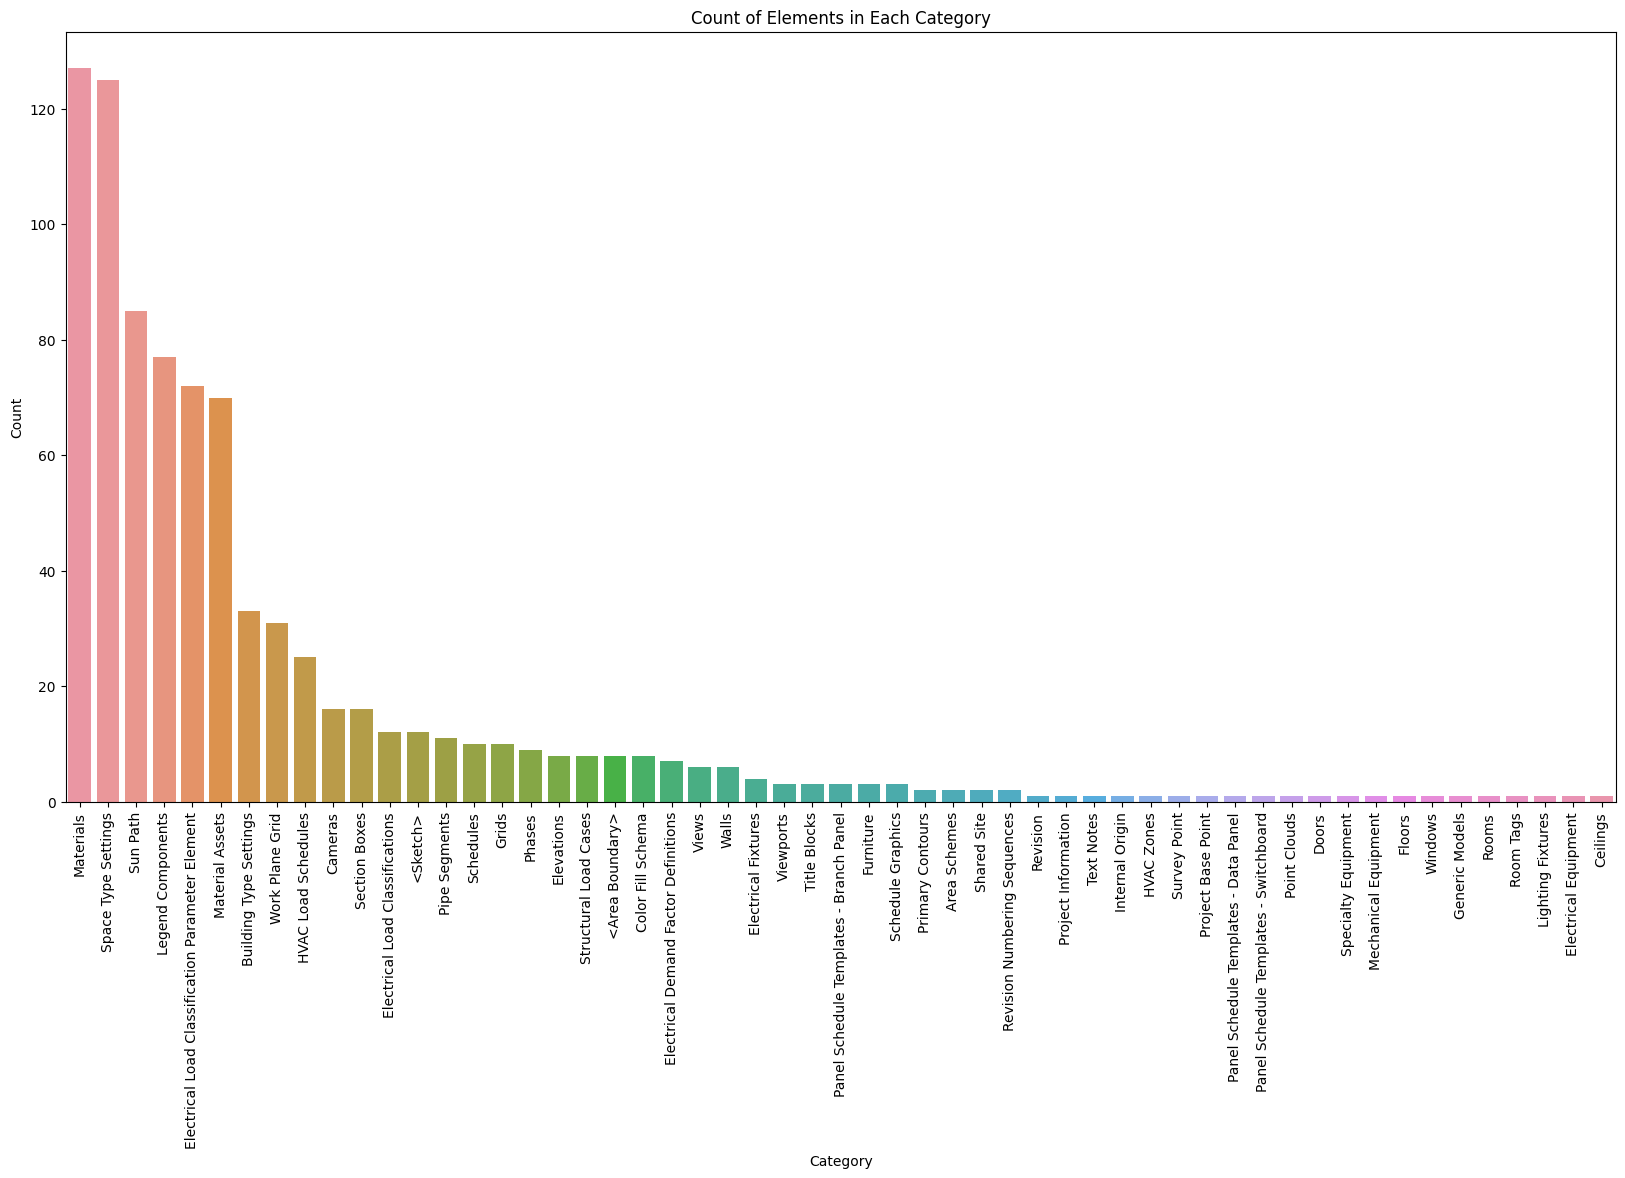

In [6]:
# get all categories string 
dict_categories = prop_reader.get_all_categories()
categories = list(dict_categories.values())
# visualize with x,y : x : category, y : count element
x = []
y = []
for cate in categories:
    df_cate = prop_reader.get_data_by_category(cate)
    if(df_cate.shape[0] == 0):
        continue
    y.append(df_cate.shape[0])
    x.append(cate)
x_sorted, y_sorted = zip(*sorted(zip(x, y), key=lambda pair: pair[1], reverse=True))
plt.figure(figsize=(20,10))
sns.barplot(x=list(x_sorted), y=list(y_sorted))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Elements in Each Category')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


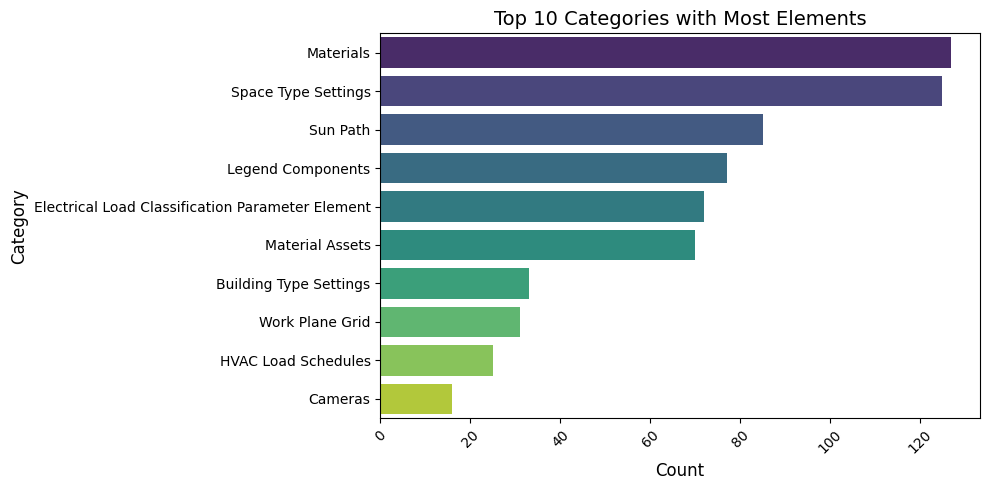

In [7]:
y_top10 = list(x_sorted)[:10]
x_top10 = list(y_sorted)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=x_top10, y=y_top10, palette='viridis')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 10 Categories with Most Elements', fontsize=14)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

Why have so many categories don't relate to data ? 
Try check materials 

## Materials

In [8]:
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 20)
df_materials = prop_reader.get_data_by_categories(["Materials"])
df_materials

,dbId,external_id,ElementId,Name,...,Compression parallel to grain,Compression perpendicular to grain,Shear parallel to grain,Shear perpendicular to grain
0,70,9693c920-050e-4443-9b38-2491295576d1-00000018,24,Default,...,NaN,NaN,NaN,NaN
1,71,9693c920-050e-4443-9b38-2491295576d1-00000019,25,Default Wall,...,NaN,NaN,NaN,NaN
2,72,9693c920-050e-4443-9b38-2491295576d1-0000001a,26,Default Roof,...,NaN,NaN,NaN,NaN
3,73,9693c920-050e-4443-9b38-2491295576d1-0000001b,27,Glass,...,NaN,NaN,NaN,NaN
4,74,9693c920-050e-4443-9b38-2491295576d1-0000001e,30,Phase - Temporary,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
122,4074,1778bac4-e3db-4ebe-928a-2389f5923e07-0004bd22,310562,Material 10,...,NaN,NaN,NaN,NaN
123,4076,1778bac4-e3db-4ebe-928a-2389f5923e07-0004bd24,310564,Material 12,...,NaN,NaN,NaN,NaN
124,4078,1778bac4-e3db-4ebe-928a-2389f5923e07-0004bd26,310566,Material 14,...,NaN,NaN,NaN,NaN
125,4173,1e2137e9-677d-4784-8914-3e8d0d39e89c-0004c9b2,313778,Dynamo,...,NaN,NaN,NaN,NaN


In [9]:
df_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dbId                                127 non-null    int64  
 1   external_id                         127 non-null    object 
 2   ElementId                           127 non-null    object 
 3   Name                                127 non-null    object 
 4   Category                            127 non-null    object 
 5   CategoryId                          127 non-null    int64  
 6   Image                               127 non-null    object 
 7   Keynote                             127 non-null    object 
 8   Export to IFC                       127 non-null    object 
 9   Export to IFC As                    127 non-null    object 
 10  IFC Predefined Type                 127 non-null    object 
 11  IfcGUID                             127 non-n

In [10]:
df_materials.describe()

,dbId,CategoryId,Cost,Data.Hello.Parquet,...,Compression parallel to grain,Compression perpendicular to grain,Shear parallel to grain,Shear perpendicular to grain
count,127.000000,127.0,127.0,127.0,...,5.0,5.0,5.0,5.0
mean,2338.330709,-2000700.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std,1411.906951,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
min,70.000000,-2000700.0,0.0,0.0,...,0.0,0.0,0.0,0.0
25%,613.500000,-2000700.0,0.0,0.0,...,0.0,0.0,0.0,0.0
50%,2790.000000,-2000700.0,0.0,0.0,...,0.0,0.0,0.0,0.0
75%,3514.500000,-2000700.0,0.0,0.0,...,0.0,0.0,0.0,0.0
max,4174.000000,-2000700.0,0.0,0.0,...,0.0,0.0,0.0,0.0


In [11]:
df_materials.shape

(127, 62)

In [ ]:
# see all name of materials
materials = df_materials["Name"].unique()
materials.sort()
materials

In [ ]:
material_parameters = df_materials.columns
material_parameters

In [ ]:
# group by material name and get the count of each material
df_materials_grouped = df_materials.groupby("Name").size().reset_index(name='Count')
df_materials_grouped = df_materials_grouped.sort_values(by='Count', ascending=False)
df_materials_grouped

,Name,Count
0,Acoustic Ceiling Tile 24 x 24,1
80,Metal Furring,1
93,Plastic - White,1
92,Plastic - Black,1
91,Plastic,1
...,...,...
37,"Concrete, Precast",1
36,"Concrete, Lightweight",1
35,"Concrete, Cast-in-Place gray",1
34,Concrete Masonry Units,1


In [ ]:
# see who create the most materials by see values column Edited by
people = df_materials["Edited by"].unique()
people

array([''], dtype=object)

## Furniture

In [ ]:
df_furniture = prop_reader.get_data_by_category("Furniture")
df_furniture

,dbId,external_id,ElementId,Name,...,deka,konstrukcija,noge,plahta
0,3506,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-00046bfe,289790,Seating-LAMMHULTS-PENNE-Chair [289790],...,NaN,NaN,NaN,NaN
1,3536,5bb069ca-e4fe-4e63-be31-f8ac44e80d30-000470ec,291052,Krevet-002-2 [291052],...,Deka,"Linen, Beige",Redwood,Linen - White
2,3840,6d22740f-4d3f-4cc6-a442-8c98ddd54f1f-00048471,296049,Table [296049],...,NaN,NaN,NaN,NaN


In [ ]:
df_furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dbId                        3 non-null      int64  
 1   external_id                 3 non-null      object 
 2   ElementId                   3 non-null      object 
 3   Name                        3 non-null      object 
 4   Category                    3 non-null      object 
 5   CategoryId                  3 non-null      int64  
 6   Level                       2 non-null      object 
 7   Elevation from Level        2 non-null      float64
 8   Host                        2 non-null      object 
 9   Offset from Host            2 non-null      float64
 10  Moves With Nearby Elements  3 non-null      int64  
 11  Armrest Left                1 non-null      float64
 12  Armrest Right               1 non-null      float64
 13  Data.Hello.Parquet          3 non-null 

In [ ]:
df_furniture.describe()

,dbId,CategoryId,Elevation from Level,Offset from Host,...,Depth,Cost,duzina,sirina
count,3.000000,3.0,2.0,2.0,...,1.0,3.000000,1.0,1.0
mean,3627.333333,-2000080.0,0.0,0.0,...,500.0,1.333333,2025.0,1500.0
std,184.784559,0.0,0.0,0.0,...,NaN,2.309401,NaN,NaN
min,3506.000000,-2000080.0,0.0,0.0,...,500.0,0.000000,2025.0,1500.0
25%,3521.000000,-2000080.0,0.0,0.0,...,500.0,0.000000,2025.0,1500.0
50%,3536.000000,-2000080.0,0.0,0.0,...,500.0,0.000000,2025.0,1500.0
75%,3688.000000,-2000080.0,0.0,0.0,...,500.0,2.000000,2025.0,1500.0
max,3840.000000,-2000080.0,0.0,0.0,...,500.0,4.000000,2025.0,1500.0


In [ ]:
# which parameters for furniture
df_furniture.columns

Index(['dbId', 'external_id', 'ElementId', 'Name', 'Category', 'CategoryId',
       'Level', 'Elevation from Level', 'Host', 'Offset from Host',
       'Moves With Nearby Elements', 'Armrest Left', 'Armrest Right',
       'Data.Hello.Parquet', 'Image', 'Comments', 'Mark', 'Workset',
       'Edited by', 'IFC Predefined Type', 'Export to IFC As', 'Export to IFC',
       'IfcGUID', 'Phase Created', 'Phase Demolished', 'Type Name',
       'Room Name', 'Room Number', 'Default Elevation', 'Width', 'Weight',
       'Height', 'Depth', 'URL', 'Model', 'Manufacturer', 'Keynote',
       'Description', 'Content Author', 'Assembly Code', 'Type Image',
       'Type Comments', 'Cost', 'Assembly Description', 'Type Mark',
       'OmniClass Number', 'OmniClass Title', 'Code Name',
       'Type IFC Predefined Type', 'Export Type to IFC As',
       'Export Type to IFC', 'Type IfcGUID', 'Seat Material', 'Legs Material',
       'Frame Material', 'Back Material', 'duzina', 'sirina', 'deka',
       'konstruk

In [ ]:
## see all the parameters contains 'IFC' and value of them 
df_furniture[df_furniture.columns[df_furniture.columns.str.contains('IFC')]]
# => look may be need input ifc value for furniture

,IFC Predefined Type,Export to IFC As,Export to IFC,Type IFC Predefined Type,Export Type to IFC As,Export Type to IFC
0,,,By Type,,,Default
1,,,By Type,,,Default
2,,,By Type,,,Default


In [ ]:
# try with walls but it same 
df_walls = prop_reader.get_data_by_category("Walls")
df_walls[df_walls.columns[df_walls.columns.str.contains('IFC')]]

,Export to IFC,Export to IFC As,IFC Predefined Type,Export Type to IFC,Export Type to IFC As,Type IFC Predefined Type
0,By Type,,,Default,,
1,By Type,,,Default,,
2,By Type,,,Default,,
3,By Type,,,Default,,
4,By Type,,,Default,,
5,By Type,,,Default,,


## Rooms

In [ ]:
df_rooms = prop_reader.get_data_by_category("Rooms")
df_rooms

,dbId,external_id,ElementId,Name,...,Occupant,Data.Hello.Parquet,Edited by,Computation Height
0,3946,1dfa4915-53f5-47c3-8e74-b489f8c02981-000493a1,299937,Sleep,...,,0,,0


In [ ]:
df_rooms.columns

Index(['dbId', 'external_id', 'ElementId', 'Name', 'Category', 'CategoryId',
       'Level', 'Workset', 'Number', 'Upper Limit', 'Limit Offset', 'Area',
       'Perimeter', 'Unbounded Height', 'Volume', 'Phase', 'Image',
       'Export to IFC', 'Export to IFC As', 'IFC Predefined Type', 'IfcGUID',
       'Comments', 'Base Offset', 'Occupancy', 'Department', 'Base Finish',
       'Ceiling Finish', 'Wall Finish', 'Floor Finish', 'Occupant',
       'Data.Hello.Parquet', 'Edited by', 'Computation Height'],
      dtype='object')

In [ ]:
## see room name,area,level,volume,...
df_rooms[["ElementId","Name","Number", "Area", "Level", "Volume","Comments"]]

,ElementId,Name,Number,Area,Level,Volume,Comments
0,299937,Sleep,A001,8.174822,Level 1,0,Room Just Sleep


In [ ]:
# see any room Area > 100 
df_rooms[df_rooms["Area"] > 100]
# => no room area > 100

,dbId,external_id,ElementId,Name,...,Occupant,Data.Hello.Parquet,Edited by,Computation Height


In [ ]:
# see ifc value of room is it filled of empty
df_rooms[df_rooms.columns[df_rooms.columns.str.contains('IFC')]]

,Export to IFC,Export to IFC As,IFC Predefined Type
0,By Type,,
